In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import unittest


def draw_plot():
    #Reading the data from csv
    df = pd.read_csv('./epa-sea-level.csv', float_precision='legacy').rename(columns={
        'Year': 'year',
        'CSIRO Adjusted Sea Level': 'sea',
        
    })

C:\Users\jschu\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:203: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


Text(0.5, 1.0, 'Predicted Rise in Sea Level')

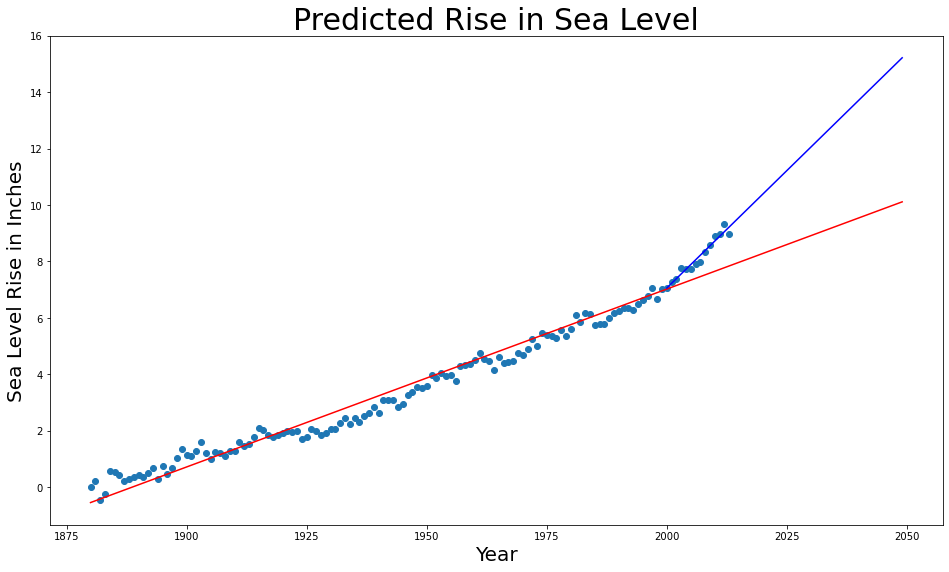

In [46]:
df = pd.read_csv('./epa-sea-level.csv', float_precision='legacy').rename(columns={
        'Year': 'year',
        'CSIRO Adjusted Sea Level': 'sea',
        
    })

#creating a scatter plot
plt.figure(1,figsize=(16,9))
plt.scatter(df['year'], df['sea'])

#adding line of best fit.
regress = linregress(df['year'], df['sea'])

#extend the x-axis so we can hold the data for future sea-level
#first, this gets the final year of current data and add the relevant rows to the dataframe
last_year = df['year'].max()
df = df.append([{'year': y} for y in range(last_year + 1, 2050)])

# the 1st line of best fit
plt.plot(df['year'],
        regress.intercept + regress.slope * df['year'], 
        c = 'r',
        label = 'fit all'
        )

#setting up 2nd line
df_recent = df.loc[(df['year'] >= 2000) * (df['year'] <= last_year)]
bestfit = linregress(df_recent['year'], df_recent['sea'])
df_recent = df_recent.append([{'year': y} for y in range(last_year +1, 2050)])

# the 2nd line of best fit
plt.plot(
    df_recent['year'], 
    bestfit.intercept + bestfit.slope * df_recent['year'], 
    c = 'b',
    label = 'fit recent')

plt.xlabel('Year', size=20)
plt.ylabel('Sea Level Rise in Inches', size=20)
plt.title('Predicted Rise in Sea Level', size=30)


,year,sea,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
90,1970,4.677165,4.401575,4.952756,NaN
91,1971,4.881890,4.610236,5.153543,NaN
92,1972,5.240157,4.968504,5.511811,NaN
93,1973,5.003937,4.736220,5.271654,NaN
94,1974,5.472441,5.204724,5.740157,NaN
...,...,...,...,...,...
31,2045,NaN,NaN,NaN,NaN
32,2046,NaN,NaN,NaN,NaN
33,2047,NaN,NaN,NaN,NaN
34,2048,NaN,NaN,NaN,NaN
